## Vamos a crear un modelo de Machine Learning

Ya sabemos cuales son los pasos para desarrollar un modelo de Machine Learning, ahora vamos a crear un modelo de ML utilizando el dataset de Vinos que tenemos en nuestro repositorio.

Recordando los pasos para crear un modelo de ML:
1. **Definir el problema**: Identificar claramente el problema que queremos resolver con nuestro modelo de ML.
2. **Recolección de datos**: Obtener los datos necesarios para entrenar nuestro modelo.
3. **Preprocesamiento de datos**: Limpiar y preparar los datos para el entrenamiento del modelo.
4. **Selección del modelo**: Elegir el algoritmo de ML adecuado para nuestro problema.
5. **Entrenamiento del modelo**: Utilizar los datos preprocesados para entrenar el modelo seleccionado.
6. **Evaluación del modelo**: Evaluar el rendimiento del modelo utilizando métricas adecuadas.
7. **Ajuste del modelo**: Realizar ajustes en el modelo para mejorar su rendimiento, si es necesario.
8. **Implementación del modelo**: Desplegar el modelo para su uso en un entorno de producción.

En la seleccion de modelos de Mahine Learning, es casi siempre recomendable hacer si o si un **dummy model**, es decir un modelo que no hace nada, para tener una referencia de lo que es un modelo que no hace nada, y un modelo de **OLS**, que es un modelo de regresion lineal, para tener una referencia de lo que es un modelo de regresion lineal, y luego comparar los resultados con el modelo que vamos a crear.

Un Modelo de ML siempre tiene que ser mejor que un modelo dummy o de un modelo de OLS, si no es asi, entonces el modelo de ML no esta haciendo nada, y no tiene sentido utilizarlo.

Lo primero que hay que hacer es un **split** de los datos, es decir, separar los datos en un conjunto de entrenamiento y un conjunto de prueba, para poder evaluar el rendimiento del modelo de ML que vamos a crear. Usualmente se utiliza un 80% de los datos para el entrenamiento y un 20% para la prueba, pero esto puede variar dependiendo del tamaño del dataset y de la cantidad de datos disponibles.



## Construyendo un modelo de ML desde Cero

### 1. Definir el problema

Para esta prueba tenemos el dataset de vinos, que tiene como objetivo predecir la calidad de un vino a partir de sus características fisicoquímicas. Por lo tanto, nuestro problema es poder crear un modelo que pueda predecir la calidad de un vino a partir de sus características fisicoquímicas.

### 2. Recolección de datos

Ya tenemos el dataset de vinos, que se encuentra en nuestro repositorio, por lo tanto, no necesitamos recolectar datos, ya los tenemos.

In [1]:
# cargamos algunas librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# cargamos la base de datos de vinos rojos
df = pd.read_csv("../ydata-profiling/wine+quality/winequality-red.csv", sep=";")
# mostramos las primeras filas del dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Preprocesamiento de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Aqui vemos que no tenemos datos faltantes, ademas tengo 1599 registros. 

Tengo 10 columnas de características fisicoquímicas y una columna de calidad, que es la variable objetivo. La variable objetivo es una variable categórica, que tiene valores enteros. Por lo tanto, nuestro problema es un problema de clasificación, ya que queremos predecir una variable categórica usando variables numéricas.

In [4]:
#rango de la variable de calidad
print("Rango de la variable de calidad:", df["quality"].min(), "-", df["quality"].max())

Rango de la variable de calidad: 3 - 8


In [5]:
# corroboramos que no tenemos datos faltantes
print("Datos faltantes por columna:")
print(df.isnull().sum())

Datos faltantes por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
# vamos a ver un poco la distribución de todo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
# Vamos a determinar las significancias de las variables
# para la significancia vamos a hacerlo con la formula de pearson p y si p es menos a 0.20 entonces la variable es significativa

for column in df.columns:
    xbar = df[column].mean()
    sigma = df[column].std()
    p = sigma/xbar
    if p < 0.20:
        print(f"{column} es significativa con p={p:.2f}")
    else:
        print(f"{column} no es significativa con p={p:.2f}")

fixed acidity no es significativa con p=0.21
volatile acidity no es significativa con p=0.34
citric acid no es significativa con p=0.72
residual sugar no es significativa con p=0.56
chlorides no es significativa con p=0.54
free sulfur dioxide no es significativa con p=0.66
total sulfur dioxide no es significativa con p=0.71
density es significativa con p=0.00
pH es significativa con p=0.05
sulphates no es significativa con p=0.26
alcohol es significativa con p=0.10
quality es significativa con p=0.14


Lo que estamos haciendo aqui es encontrar la significancia si suponemos la media de cada variable en nuestras predicciones, es decir, si suponemos que cada variable tiene el valor de su media, entonces, cual seria la calidad del vino que predeciriamos. Esto nos da una referencia de lo que es un modelo que no hace nada, es decir, un modelo dummy.

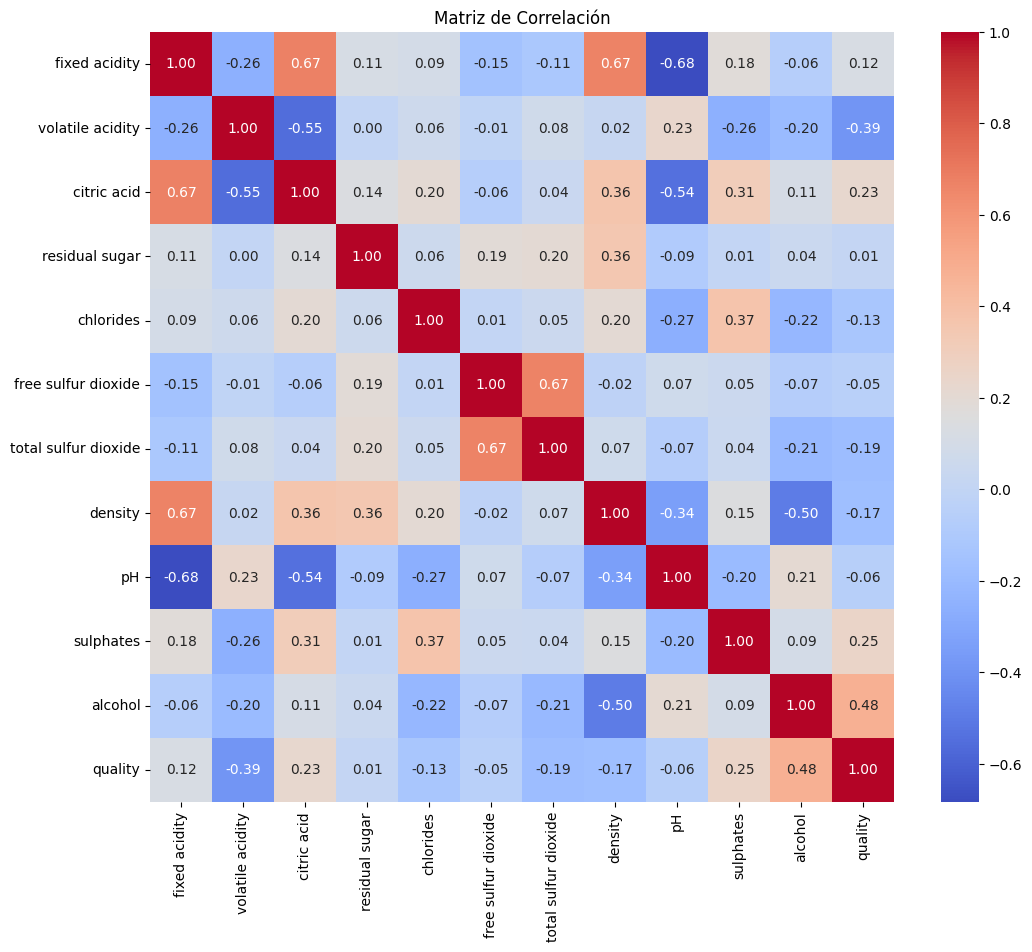

In [8]:
# tambien podemos ver la correlacion entre las variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

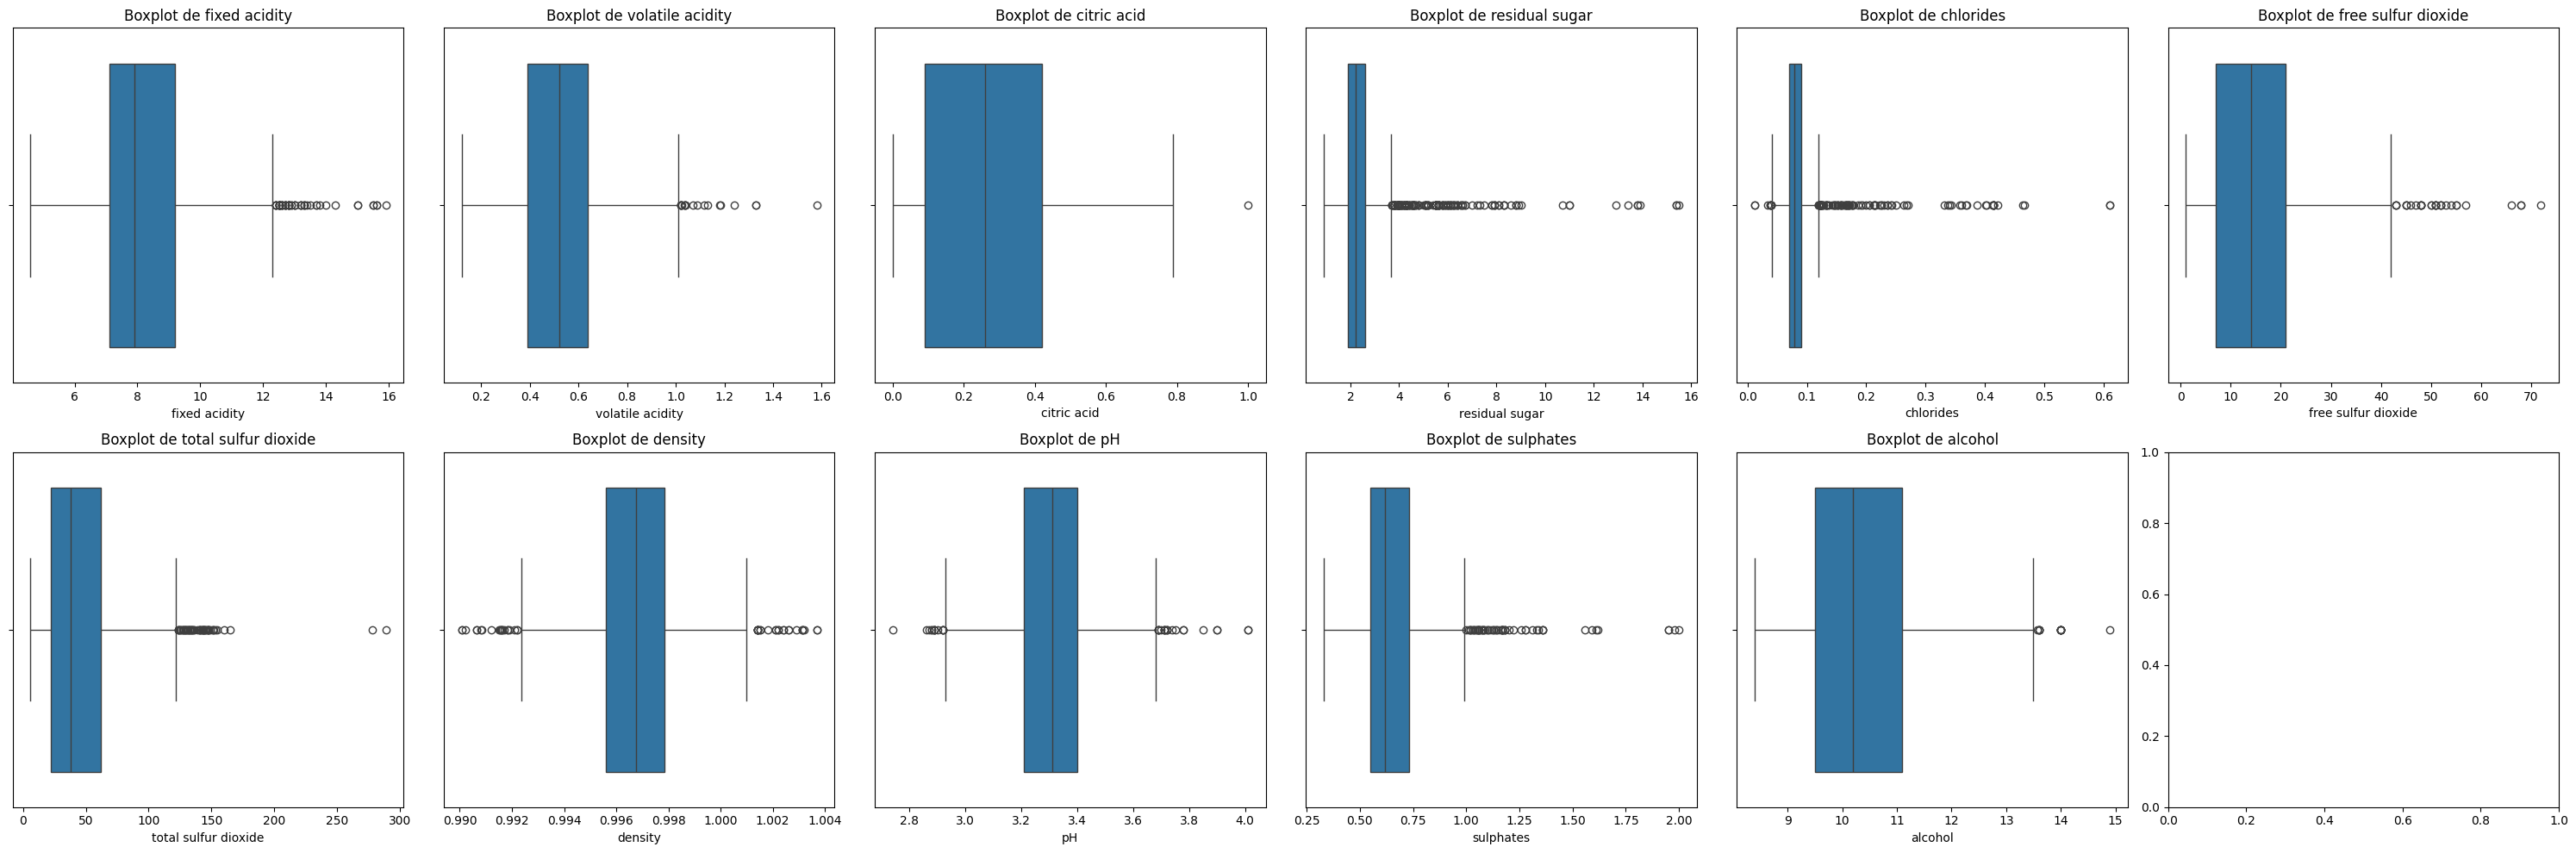

In [9]:
# vamos a ver un boxplot de cada variable en una grilla de 6x2 
fig, axes = plt.subplots(2, 6, figsize=(30, 10))
for i, column in enumerate(df.columns[:-1]):
    sns.boxplot(x=df[column], ax=axes[i // 6, i % 6])
    axes[i // 6, i % 6].set_title(f"Boxplot de {column}")
plt.tight_layout()
plt.show()

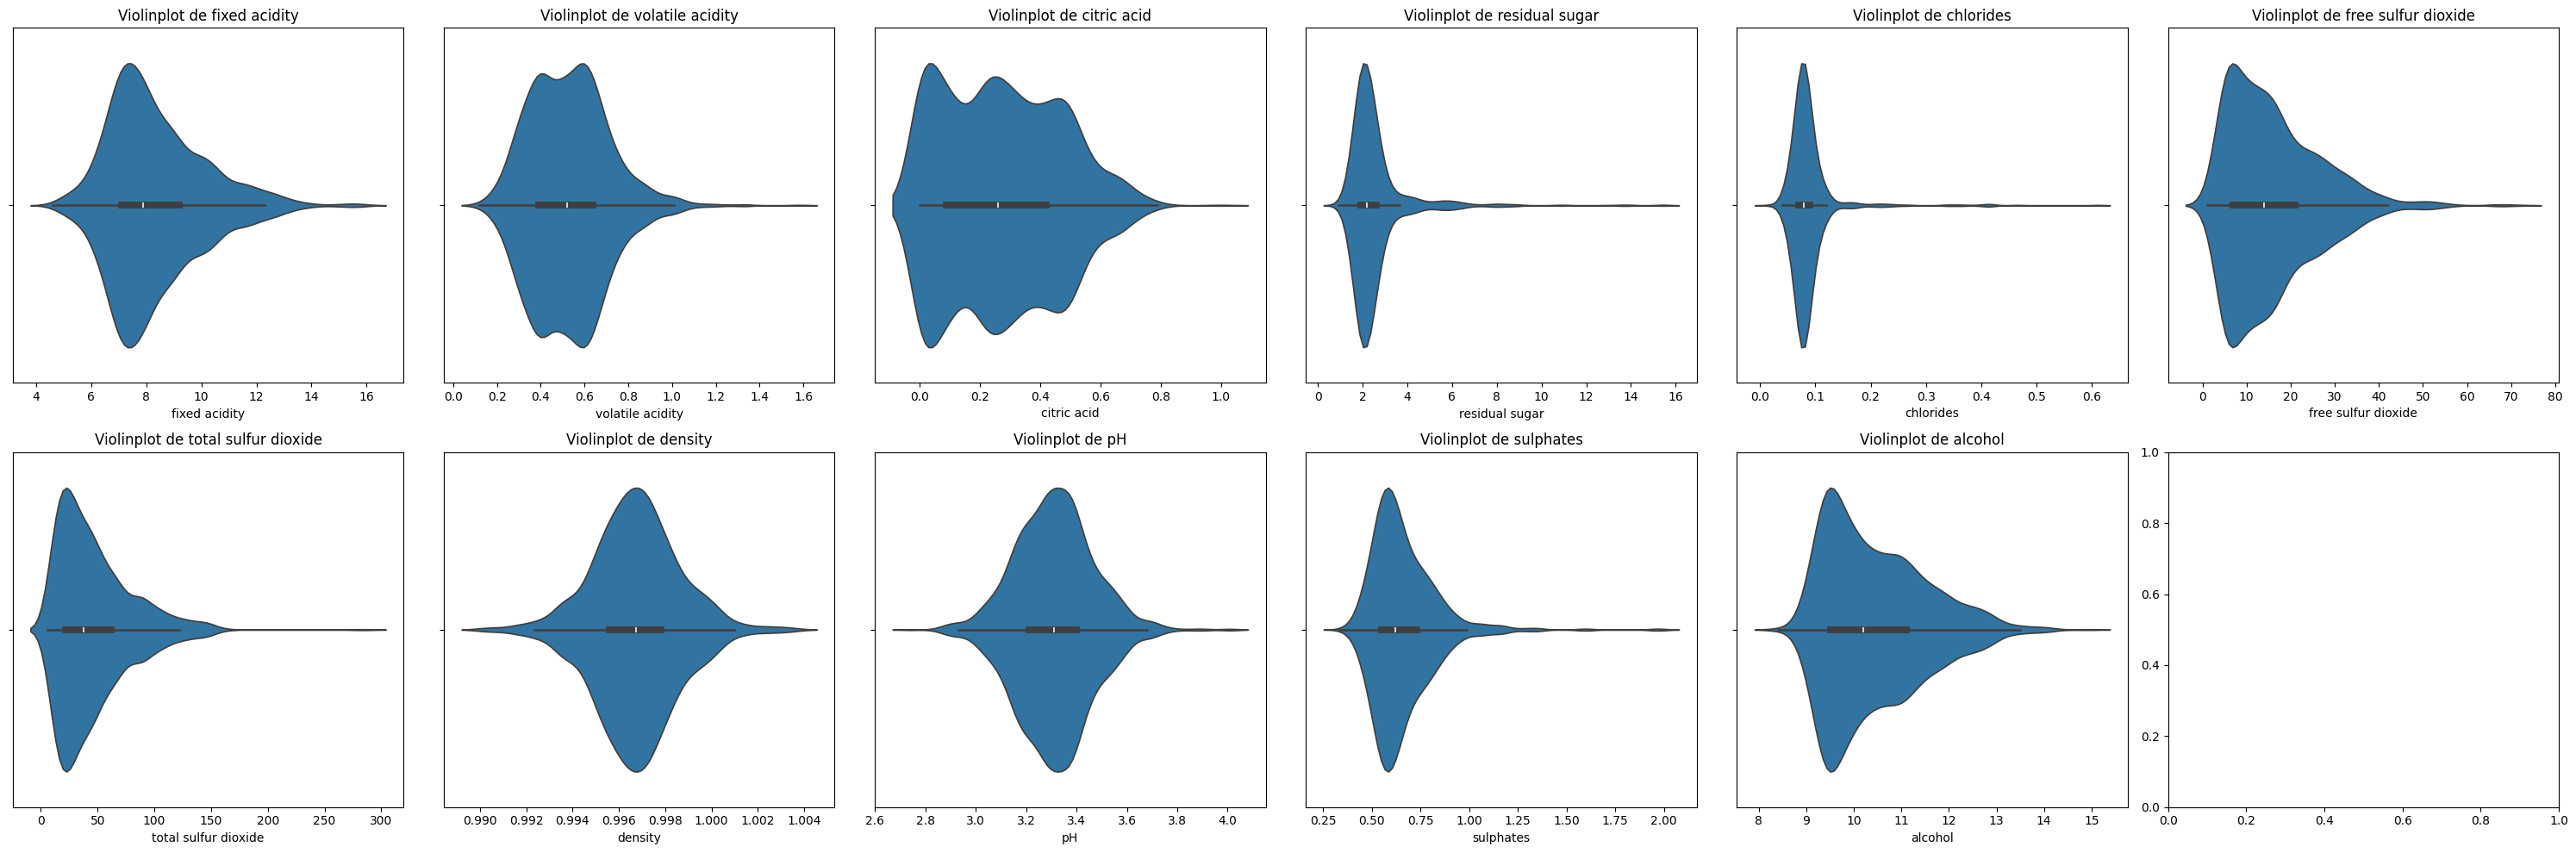

In [10]:
# tambien podemos ver una grafica violinplot para ver la distribucion de cada variable
fig, axes = plt.subplots(2, 6, figsize=(30, 10))
for i, column in enumerate(df.columns[:-1]):
    sns.violinplot(x=df[column], ax=axes[i // 6, i % 6])
    axes[i // 6, i % 6].set_title(f"Violinplot de {column}")
plt.tight_layout()
plt.show()

In [11]:
# ahora vamos a descubrir exactamene esos valores
# en este caso vamos a ver los valores que esten a 3 veces por debajo del 25% y 3 veces por encima del 75%
# solo necesito saber la cantidad de valores outliers que tengo en cada variable
for column in df.columns[:-1]:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column} tiene {len(outliers)} outliers")

fixed acidity tiene 5 outliers
volatile acidity tiene 1 outliers
citric acid tiene 0 outliers
residual sugar tiene 88 outliers
chlorides tiene 67 outliers
free sulfur dioxide tiene 4 outliers
total sulfur dioxide tiene 2 outliers
density tiene 0 outliers
pH tiene 2 outliers
sulphates tiene 16 outliers
alcohol tiene 0 outliers


Estos son los valores sospechosos de ser outliers en cada variable, es decir, los valores que estan por fuera del rango intercuartilico, que es el rango entre el primer cuartil y el tercer cuartil. Estos valores pueden ser outliers, pero no necesariamente, ya que pueden ser valores validos, pero que estan por fuera del rango intercuartilico. Por lo tanto, es importante analizar cada variable para determinar si estos valores son outliers o no.

### 4. Selección del modelo

Primero que nada, vamos a empezar que es un modelo de regresión, solo que el resultado final debe ser redondeado a un entero, ya que la variable objetivo es una variable categórica.

Primero vamos a probar los siguientes modelos para regresion:
- **Regresión Lineal**: Es un modelo de regresión que asume una relación lineal entre las variables independientes y la variable dependiente. Es fácil de interpretar y puede ser un buen punto de partida para problemas de regresión.
- **Dummy regression**: Es un modelo de regresión que no hace nada, es decir, siempre predice la media de la variable objetivo. Es un modelo de referencia para comparar el rendimiento de otros modelos de regresión.
- **Decision Tree Regressor**: Es un modelo de regresión que utiliza un árbol de decisión para predecir la variable objetivo. Es capaz de capturar relaciones no lineales entre las variables independientes y la variable dependiente.
- **Random Forest Regressor**: Es un modelo de regresión que utiliza un conjunto de árboles de decisión para predecir la variable objetivo. Es capaz de capturar relaciones no lineales entre las variables independientes y la variable dependiente, y es menos propenso al sobreajuste que un solo árbol de decisión.

Si suponemos que son modelos de clasificación, entonces, los modelos que vamos a probar son:
- **Decision Tree Classifier**: Es un modelo de clasificación que utiliza un árbol de decisión para predecir la variable objetivo. Es capaz de capturar relaciones no lineales entre las variables independientes y la variable dependiente.
- **Random Forest Classifier**: Es un modelo de clasificación que utiliza un conjunto de árboles de decisión para predecir la variable objetivo. Es capaz de capturar relaciones no lineales entre las variables independientes y la variable dependiente, y es menos propenso al sobreajuste que un solo árbol de decisión.

In [12]:
# vamos a cargar los modelos de ML que vamos a probar
#lineal
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
#dummy
from sklearn.dummy import DummyRegressor, DummyClassifier

### 5. Entrenamiento del modelo

Primero vamos a partir nuestros datos en un conjunto de entrenamiento y un conjunto de prueba, utilizando un 70% de los datos para el entrenamiento y un 15% para la validación y un 15% para la prueba. Luego, vamos a entrenar cada uno de los modelos que hemos seleccionado utilizando el conjunto de entrenamiento.

In [13]:
# primero vamos a hacer el split de los datos
X = df.drop("quality", axis=1)
y = df["quality"]

# vamos a hacer train, test y validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=21) # esto nos da un 70% para entrenamiento y un 30% para test y validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=21) # esto nos da un 15% para validation y un 15% para test
# en total tenemos 70% para entrenamiento, 15% para validation y 15% para test

In [14]:
# solo para validar que el split se hizo correctamente vamos a imprimir las formas de cada conjunto
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1119, 11)
y_train shape: (1119,)
X_val shape: (240, 11)
y_val shape: (240,)
X_test shape: (240, 11)
y_test shape: (240,)


In [15]:
# Empezamos llamando todos los modelos que vamos a probar
dummy_regressor = DummyRegressor(strategy="mean")
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor(random_state=21)
random_forest_regressor = RandomForestRegressor(n_estimators=1000, random_state=21)


In [16]:
#bien ahora vamos a entrenar cada uno de los modelos con el conjunto de entrenamiento
dummy_regressor.fit(X_train, y_train)
linear_regressor.fit(X_train, y_train)
decision_tree_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",1000
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsampl

### 6. Evaluación del modelo

Bien ya se llamó a los modelos, ya entrenaron los modelos, ahora tenemos que evaluar el rendimiento de cada uno de los modelos utilizando el conjunto de validación, para poder comparar el rendimiento de cada uno de los modelos y elegir el mejor modelo para nuestro problema. Ahora tenemos que escoger las métricas de evaluación adecuadas para nuestro problema.

Evaluaremos con **R2 Score**, **MSE** y **MAE** para estos modelos de regresión.

In [17]:
# importamos las metricas de evaluacion
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
# vamos a evaluar el rendimiento de cada uno de los modelos utilizando el conjunto de validación, para poder comparar el rendimiento de cada uno de los modelos y elegir el mejor modelo para nuestro problema. Ahora tenemos que escoger las métricas de evaluación adecuadas para nuestro problema.
# Evaluaremos con R2 Score, MSE y MAE para estos modelos de regresión
models = {
    "Dummy Regressor": dummy_regressor,
    "Linear Regression": linear_regressor,
    "Decision Tree Regressor": decision_tree_regressor,
    "Random Forest Regressor": random_forest_regressor,
}
#veamos los resultados en una tabla
results = []
#los resultados a solo dos decimales
for name, model in models.items():
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    results.append({
        "Model": name,
        "MSE": round(mse, 2),
        "MAE": round(mae, 2),
        "R2 Score": round(r2, 2),
    })
results_df = pd.DataFrame(results)
print(results_df)

                     Model   MSE   MAE  R2 Score
0          Dummy Regressor  0.63  0.68     -0.00
1        Linear Regression  0.40  0.49      0.36
2  Decision Tree Regressor  0.70  0.50     -0.12
3  Random Forest Regressor  0.35  0.43      0.45


In [19]:
# supongamos nuevos valores para predecir
# supongamos que tengo estos valores para predecir la calidad del vino
new_data = {
    "fixed acidity": 8.2,
    "volatile acidity": 0.42,
    "citric acid": 0.5,
    "residual sugar": 14,
    "chlorides": 0.54,
    "free sulfur dioxide": 69,
    "total sulfur dioxide": 224,
    "density": 1.0,
    "pH": 3.5,
    "sulphates": 1.73,
    "alcohol": 12
}

In [20]:
# vamos a hacer una prediccion con el mejor modelo que es el random forest regressor
new_data_df = pd.DataFrame([new_data])
predicted_quality = random_forest_regressor.predict(new_data_df)
print(f"La calidad predicha del vino es: {predicted_quality[0]:.2f}")

La calidad predicha del vino es: 6.16


### 7. Ajuste del modelo con hiperparametros

In [22]:
# vamos a cambiar algunos paramtros del random forest regressor para ver si podemos mejorar el rendimiento del modelo
# primero que nada ya no sacamos 70/30 si no 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) # esto nos da un 80% para entrenamiento y un 20% para test
# ahora vamos a entrenar el modelo con el nuevo split
rf = RandomForestRegressor(n_estimators=1500, max_depth=16, random_state=21, n_jobs=-1,min_samples_leaf=4, min_samples_split=6, max_features="sqrt", bootstrap=True)
rf.fit(X_train, y_train)
# ahora vamos a evaluar el modelo con el conjunto de validacion
y_pred = rf.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Random Forest Regressor con nuevos parametros - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 Score: {r2:.2f}")

Random Forest Regressor con nuevos parametros - MSE: 0.29, MAE: 0.39, R2 Score: 0.54


In [ ]:
# y si intentamos ver cual es la mejor configuracion de hiperparametros usando arreglos for para probar diferentes combinaciones de hiperparametros
""" best_mse = float("inf")
best_params = None
n_estimators_options = [100, 300,500]
max_depth_options = [10, 16, 20]
min_samples_leaf_options = [1, 4, 6]
min_samples_split_options = [2, 6, 10]
max_features_options = ["sqrt", "log2", None]
bootstrap_options = [True, False]
for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        for min_samples_leaf in min_samples_leaf_options:
            for min_samples_split in min_samples_split_options:
                for max_features in max_features_options:
                    for bootstrap in bootstrap_options:
                        rf = RandomForestRegressor(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            min_samples_split=min_samples_split,
                            max_features=max_features,
                            bootstrap=bootstrap,
                            random_state=21,
                            n_jobs=-1
                        )
                        rf.fit(X_train, y_train)
                        y_pred = rf.predict(X_val)
                        mse = mean_squared_error(y_val, y_pred)
                        if mse < best_mse:
                            best_mse = mse
                            best_params = {
                                "n_estimators": n_estimators,
                                "max_depth": max_depth,
                                "min_samples_leaf": min_samples_leaf,
                                "min_samples_split": min_samples_split,
                                "max_features": max_features,
                                "bootstrap": bootstrap
                            }
print(f"Mejor MSE: {best_mse:.2f} con parametros: {best_params}") """

Mejor MSE: 0.21 con parametros: {'n_estimators': 300, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'max_features': 'sqrt', 'bootstrap': False}


In [ ]:
# ahora vamos a entrenar el modelo con los mejores parametros encontrados
""" rf_best = RandomForestRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_leaf=best_params["min_samples_leaf"],
    min_samples_split=best_params["min_samples_split"],
    max_features=best_params["max_features"],
    bootstrap=best_params["bootstrap"],
    random_state=21,
    n_jobs=-1
)
rf_best.fit(X_train, y_train)
# ahora vamos a evaluar el modelo con el conjunto de validacion
y_pred = rf_best.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Random Forest Regressor con mejores parametros - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 Score: {r2:.2f}") """

Random Forest Regressor con mejores parametros - MSE: 0.21, MAE: 0.24, R2 Score: 0.67


In [31]:
#vamos a guardar estos parametros en un diccionario para usarlos despues
best_rf_params = {
    "n_estimators": 300,
    "max_depth": 20,
    "min_samples_leaf": 1,
    "min_samples_split": 2,
    "max_features": "sqrt",
    "bootstrap": False
}
    

Entonces por el momento esta es la mejor estimacion de estimadores usando Random Forest Regressor. El resultado obtenido es:

In [32]:
# ahora vamos a entrenar el modelo con best_rf_params
rf_best = RandomForestRegressor(
    n_estimators=best_rf_params["n_estimators"],
    max_depth=best_rf_params["max_depth"],
    min_samples_leaf=best_rf_params["min_samples_leaf"],
    min_samples_split=best_rf_params["min_samples_split"],
    max_features=best_rf_params["max_features"],
    bootstrap=best_rf_params["bootstrap"],
    random_state=21,
    n_jobs=-1
)
rf_best.fit(X_train, y_train)
# ahora vamos a evaluar el modelo con el conjunto de validacion
y_pred = rf_best.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Random Forest Regressor con mejores parametros - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 Score: {r2:.2f}")

Random Forest Regressor con mejores parametros - MSE: 0.21, MAE: 0.24, R2 Score: 0.67


In [33]:
# con estos nuevos parametros vamos a hacer la prediccion con el nuevo modelo
predicted_quality = rf_best.predict(new_data_df)
print(f"La calidad predicha del vino con el nuevo modelo es: {predicted_quality[0]:.2f}")

La calidad predicha del vino con el nuevo modelo es: 5.98


### 8. Implementación del modelo